## Learning Objective

Today we are going to focus on two questions:

1. How can we automatically find patterns?
2. How can we prove a pattern exists once we find it?

Both of these questions turn out to be crucial for doing machine learning, and we will 

# Make a pattern

Let's start off by making a pattern and getting some data on that pattern:

In [1]:
%matplotlib inline

import numpy as np
import seaborn as sns

In [2]:
secret_pattern = 42 + 256

X = np.random.randint(0, 1024, size=10)
Y = X ^ secret_pattern

# adding in random noise to the first entry
Y[0] += 1

In [3]:
X, Y

(array([186, 494, 325,  27, 712, 753, 674, 977, 919, 261]),
 array([401, 196, 111, 305, 994, 987, 904, 763, 701,  47]))

In [4]:
for x, y in zip(X, Y):
    print('When X is {0:010b}, Y is {1:010b}'.format(x, y))

When X is 0010111010, Y is 0110010001
When X is 0111101110, Y is 0011000100
When X is 0101000101, Y is 0001101111
When X is 0000011011, Y is 0100110001
When X is 1011001000, Y is 1111100010
When X is 1011110001, Y is 1111011011
When X is 1010100010, Y is 1110001000
When X is 1111010001, Y is 1011111011
When X is 1110010111, Y is 1010111101
When X is 0100000101, Y is 0000101111


We have two columns an X column and a Y column (so two binary number for each sample). We know that we can calculate many summary statistics for each of these columns: mean, median, max. We could even calculate the dependence of these two columns with their correlation. 

But what if somebody told you that there was a relationship between these two columns that was more complex than just correlation (a very important assumption in ML - a pattern exists). Well there should be two questions that immediately pop into mind:

1. What is this pattern?
2. Prove it?

Let's go ahead and answer these two questions in class today.

# Finding patterns

Our first quesiton is: can we find the pattern (even if you knew it existed)? The old way to do this would be to look at point after point and try to use a human brain to find a pattern. The problem with this is twofold:

1. There can be millions of points  
2. Sometimes people can see the pattern but not be able to write it down because it is so complex

Both of these issues are an issues of scale. One person can't look at every wikapedia article and one person could not write down all the series of patterns their brain used to recognize a cat.

So in good old human spirit, maybe we can push off a some of the work to a computer to do it for us!

# What are computers good at?

If we are going to be pushing off work to a computer, we should understand what computers are good at, so we just give them the work they are good at and we do the rest of the work ourselves. So what are computers good at? It turns out they are only really good at one thing: doing tons of simple operations really fast. 

So how does that help us? Well maybe the computer can try out each possible pattern on the dataset and return the best one? But we are again in a pickle:

1. Which pattern is best?
2. What if there are a lot of patterns?

Well this first problem is easily solved: the best pattern is the one that best matches our data. We simply look at the data and see how many samples match the pattern (divided by the total number of samples). We call this measure accuracy.

The second problem is more difficult. The problem is that there are any number of possible relationships in the data. Maybe it turns out that column X is related to column Y by hashing the results 100k times. This would be an immeasurably complex relationship. If we wanted to check all of such relationships and see which is best, we would spend an infinitely infinite amount of time.

So how do we narrow the search?

Well it turns out we can combine the human brain and the computer by dividing the problem appropriately

# The Hypothesis Set

So here is the plan. We will use the massive compute and blinding speeds of a computer to search accross as many patterns as possible, looking for the true relationship in the data. The computer will find the best pattern (the one that best matches the data) and return it. All we need to do is to tell the computer which patterns it should look through. 

Let's go ahead and do this exact approach for the data above:

In [5]:
for x, y in zip(X, Y):
    print('When X is {0:010b}, Y is {1:010b}'.format(x, y))

When X is 0010111010, Y is 0110010001
When X is 0111101110, Y is 0011000100
When X is 0101000101, Y is 0001101111
When X is 0000011011, Y is 0100110001
When X is 1011001000, Y is 1111100010
When X is 1011110001, Y is 1111011011
When X is 1010100010, Y is 1110001000
When X is 1111010001, Y is 1011111011
When X is 1110010111, Y is 1010111101
When X is 0100000101, Y is 0000101111


First step is to narrow down on the patterns that we want to look for. Let's look at the first digit from the X and Y binarys above. I looks like every time the X is 1, the first digit of Y is 1. And for the second digit every time the X value is 1 the Y value is 0. 

So there does seem to be some clear patterns here, though we are not entirely sure what. But what we can do is narrow the search space of our computer. 

We will tell the computer: instead of looking through all patterns, look through all patterns where the digits in Y are simply dependent on their corresponding digit in X.

I can write one such pattern this way:

In [6]:
# this is the flip all the bits pattern
'X: {0:010b} and the flip {1:010b}'.format(X[0], X[0] ^ 0b11111_11111)

'X: 0010111010 and the flip 1101000101'

So ultimately the computer will need to look through all binary strings that are 10 digits long. So here is the Hypothesis space:

In [7]:
hypothesis_set = np.arange(1024)
bin(hypothesis_set[-1])

'0b1111111111'

# The Learning Algorithm

The next step in our process is called the learning algorithm, this is the algorithm that will find the best hypothesis. In our case, it will be the simplest one: look through all the hypotheses (patterns) in the hypothesis set. We will then test each hypothesis and see how accurate it is on the data. In this way we will find the best one!

In [8]:
def learning_alg(X, Y, hypothesis_set):
    best_hypo = None
    
    # for each hypo in the set
    for hypothesis in hypothesis_set:
        num_correct = 0.
        num_wrong = 0.
        
        # check the accuracy
        for x, y in zip(X, Y):
            if x ^ hypothesis == y:
                num_correct += 1
            else:
                num_wrong += 1
        
        # and if it is more accurate, save it
        accuracy = num_correct / (num_correct + num_wrong)
        if best_hypo is None or best_hypo[0] < accuracy:
            best_hypo = accuracy, hypothesis
            
    return best_hypo

Pretty simple, just look the the hypotheses and return the best one.

# The final hypothesis

This best hypothesis is the one that you ultimately return, aka the best hypothesis, and the one that you beleive is closest to the true pattern in your data, let's look to see if we got the right one below:

In [9]:
acc, final_hypothesis = learning_alg(X, Y, hypothesis_set)
'Or final hypotheis is to xor X with this {:010b} binary string for an accuracy of {}'.format(final_hypothesis, acc)

'Or final hypotheis is to xor X with this 0100101010 binary string for an accuracy of 0.9'

In [10]:
# let's check to see if it works
for x, y in zip(X, Y):
    print('When X is {0:010b}, our pattern would predict: {1:010b}, and Y is {2:010b}'.format(x, x ^ final_hypothesis, y))

When X is 0010111010, our pattern would predict: 0110010000, and Y is 0110010001
When X is 0111101110, our pattern would predict: 0011000100, and Y is 0011000100
When X is 0101000101, our pattern would predict: 0001101111, and Y is 0001101111
When X is 0000011011, our pattern would predict: 0100110001, and Y is 0100110001
When X is 1011001000, our pattern would predict: 1111100010, and Y is 1111100010
When X is 1011110001, our pattern would predict: 1111011011, and Y is 1111011011
When X is 1010100010, our pattern would predict: 1110001000, and Y is 1110001000
When X is 1111010001, our pattern would predict: 1011111011, and Y is 1011111011
When X is 1110010111, our pattern would predict: 1010111101, and Y is 1010111101
When X is 0100000101, our pattern would predict: 0000101111, and Y is 0000101111


In [11]:
final_hypothesis == secret_pattern

True

# Machine Learning

So what did we just do? We just did something that could be called automated pattern finding, or more commonly called machine learning. 

We inadvertently made some assumptions along the way about how machine learning is done, but now that we have a feel for it, let's specify how we find patterns from data.

For machine learning to work, you need a couple of statements to be true about your problem:

* A pattern exists
* We cannot pin the pattern down mathematically
* We have data on it

If these statements are true then we should think about doing machine learning. If no pattern exists, then what we are trying to predict is completely random, we can't do it. If we can pin it down mathematically, then we should just do that. If we don't have data on it, well back to the drawing board.

That certainly gives us intuition about the assumptions we will need, but let's formalize them below:

In [69]:
import networkx as nx
from nxpd import draw
from nxpd import nxpdParams
nxpdParams['show'] = 'ipynb'

c0 = 'Unknown target function, f(X) = y'
c1 = 'Inputs, (x_1, y_1), ..., (x_n, y_n)'
c2 = 'Learning Algorithm'
c3 = 'Hypothesis set, H'
c4 = 'Final Hypothesis, g(X) = y'
c5 = 'IID samples from a r.v. X'

G = nx.DiGraph()
G.add_node(c0)
G.add_node(c1)
G.add_edge(c0, c1)
G.add_node(c2)
G.add_edge(c1, c2)
G.add_node(c3)
G.add_edge(c3, c2)
G.add_node(c4)
G.add_edge(c2, c4)
G.add_node(c5)
G.add_edge(c5, c1)

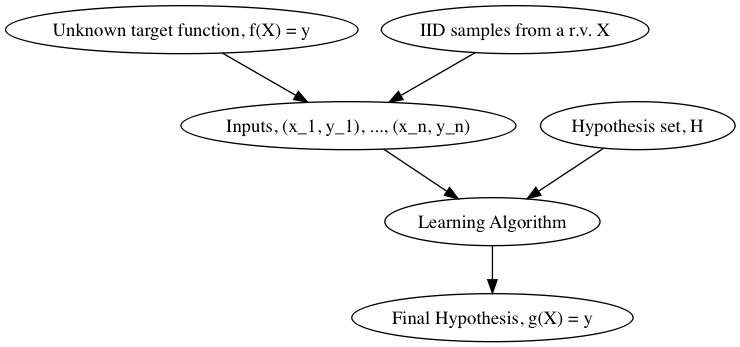

In [70]:
draw(G)

Okay, let's discuss what is happening above.

First we assume that there is some real pattern out there called f (notice in our above example we artificially created it). This pattern is the one that generates the y part of the data from the x part. So in physics this is easy to grasp: you drop a ball and you measure how hard it hits the ground. In this case there is some function that takes the mass of the ball and the height which the ball was dropped from and will spit back a force.


The next assumption is one that we have already seen, we have data. The difference here is that we actually have something along with the data, the output of f. Notice that the inputs now depend on f. 

As always we still have the IID samples assumption (we will use that in a bit to answer the second part of the question we had). Above we just generated uniformly random numbers, so this checks out.

The next thing we should look at is H, the hypothesis set. This is the set of all hypotheses that our computer is going to look through. What is very important here is that humans determine this step! Above our hypothesis set is the set of all xor functions.

Now both the data and the hypothesis set are sent to the learning algorithm to choose the best hypothesis to return. We just used exhaustive search.

And then finally we return the best hypothesis, which we call the final hypothesis. This is the hypothesis that the ML algorithm will return to you in the end.

The point of the entire process is to return a g that is as close as possible to f. Or functional approximation.

# Prove it!

Our second question to ask ourselves is: does this pattern we found really exist? 

At this point you might be like, "Hold on, we just searched through all of the data, of course the pattern exists!"

The problem is: does this pattern exist in the data you have not seen before? Aka, does this pattern genralize?

---

Well let's ask ourselves how we know that this pattern works on our data that we have. Well we found the accuracy on the sample data. Well what if we were able to find the pattern's accuracy on the population data, aka infinite samples. Then if it were high enough we would beleive that it actually exists. Well unfortunately we are looking to find a funciton of the population, but we only have the sample...

Well I hope you see the answer to this one: the plug in principle and confidence intervals! Let's do it below:

/Users/tucker/Desktop/data-science-foundations-master/env/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


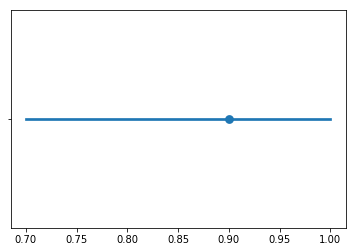

In [72]:
right_or_not = []

for x, y in zip(X, Y):
    right_or_not.append(x ^ final_hypothesis == y)
    
sns.pointplot(right_or_not)

Looks like we can be pretty confident that there is a pattern :)

## Next time

You might have already seen the problem with what we are currently doing, but next time we will explore the problem of finding the perfect hypothesis, and estimating it's efficacy on the population.

## Learning Objective

Today we are going to focus on two questions:

1. How can we automatically find patterns?
2. How can we prove a pattern exists once we find it?

Both of these questions turn out to be crucial for doing machine learning, and we will 

## Comprehension Questions

1.	Can all learning problems be expressed as a function?
2.	If you wanted to learn to make programs that sort numbers what would the ingredients to the machine learning graph be?
5.	If you have seen the input before, you know what the output should be, right?
1. If you **assume** the pattern is deterministic, what hypothesis/pattern could you propose that would always have 100% accuracy?
1. What happens if the true hypothesis is not in your hypothesis set? What do you return?
1. How do you choose your hypothesis set?
1. Is there a faster learning algorithm for the problem above?
1. Do all of the features for a particular sample need to be collected at the same time? What does this tell us about the power of some of the patterns we find? 
1. Are there other functions on patterns of data other than accuracy that we might be interested in? Why?
1. How would you figure out how much data you would need to get a good confidence interval for a prediction problem? 